# Preparation and cleaning of the dataset

In [1]:
#Mount Drive if running in Colab
from sys import path
import os

if 'google.colab' in str(get_ipython()):
  from google.colab import drive

  root_PATH = '/content/drive/My Drive/nlp-seminar/repository'
  drive_mount_location = '/content/drive'

  drive.mount(drive_mount_location, force_remount=True)
  path.append(root_PATH)
else:
  root_PATH = os.path.abspath("..")

## Dataset Cleaning

In [ ]:
#TODO:

## Split Dataset

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
data_df = pd.read_csv(root_PATH + '/data/data.csv')

#Convert the topics into a list
data_df["Topic"] = data_df["Topic"].apply(eval)

In [9]:
train_df, rest_df = train_test_split(data_df, test_size=0.3,shuffle = True)
validation_df,test_df = train_test_split(rest_df,test_size=0.5,shuffle = True)

## Analyze Splits

In [10]:
#Convert lists into Pandas series so they can be analized
def list_to_series(series):
 return pd.Series([x for _list in series for x in _list])

train_topic_counts = list_to_series(train_df["Topic"]).value_counts()
validation_topic_counts = list_to_series(validation_df["Topic"]).value_counts()
test_topic_counts = list_to_series(test_df["Topic"]).value_counts()

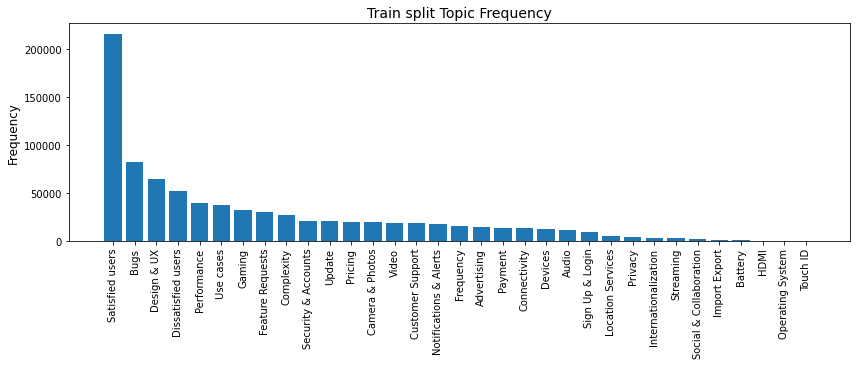

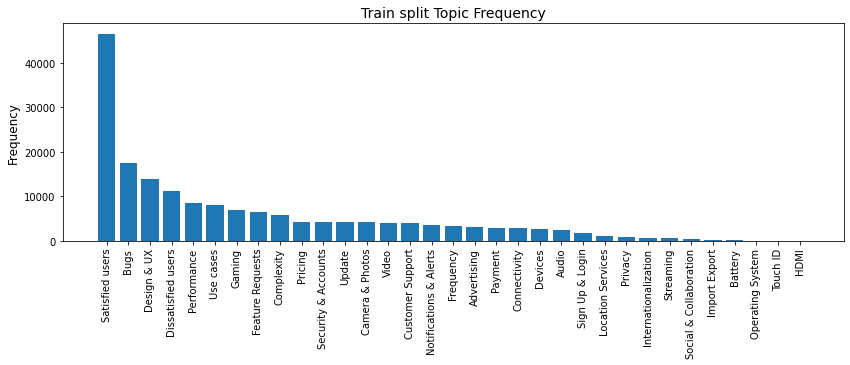

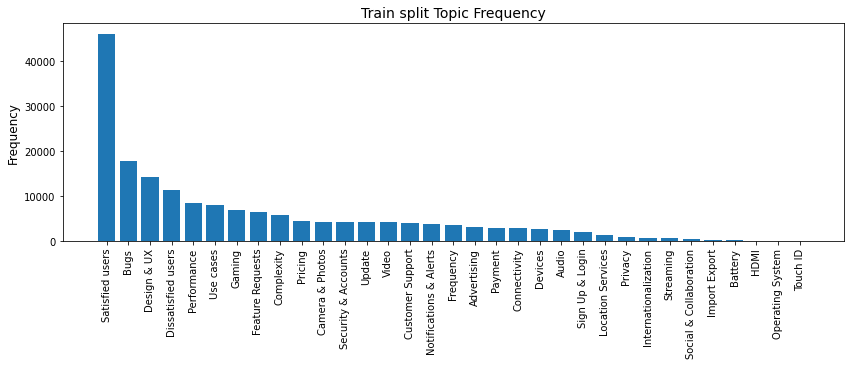

In [14]:
def plot_topics(dataframe):
    fig, ax = plt.subplots(figsize = (14,4))
    ax.bar(list_to_series(dataframe["Topic"]).value_counts().index,
            list_to_series(dataframe["Topic"]).value_counts().values)
    ax.set_ylabel("Frequency", size = 12)
    ax.set_title("Train split Topic Frequency", size = 14)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

plot_topics(train_df)
plot_topics(validation_df)
plot_topics(test_df)

## Save Splits

In [16]:
train_df.to_csv(root_PATH + '/data/train.csv')
validation_df.to_csv(root_PATH + '/data/validation.csv')
test_df.to_csv(root_PATH + '/data/test.csv')